# Visualization Notebook
This file can be used to plot your graph and to try out your solve function. It is not part of the grading.

First we import necessary packages and then define our plotting function

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()


Lets start by plotting the original street layout

In [ ]:
# Instance to solve
full_instance_path = 'data_2.json'

with open(full_instance_path) as f:
    data = json.load(f)
    g_street = json_graph.node_link_graph(data['graph'])

plot_graph(g_street, True, True)

# get type of graph
print(type(g_street))
# show attributes of graph， class 'networkx.classes.graph.Graph'
print(g_street.__dict__)


In [ ]:
from agv import *

import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()









# Instance to solve
full_instance_path = 'data_4.json'
jobs, g_street= read_instance(full_instance_path)

# Construct graph --- NOTE: Please use networkx for this task, it is necessary for the plots in the Jupyter file.
g_time_expanded = nx.DiGraph()

build_graph_nodes(g_street, jobs, g_time_expanded)

build_graph_arcs(g_street, jobs, g_time_expanded)


plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)

print(g_time_expanded.edges)
print(g_time_expanded.nodes)

max_j_d = max([job['j_d'] for job in jobs.values()])
print('max: ',max_j_d)

for node in g_time_expanded.nodes:
    if node[1] != 'start' and node[1] != 'end':
        print('start', node)
        for e in g_time_expanded.out_edges(node):
                if e[0][0] != e[1][0] and e[1][1] != 'end' and e[1][1] != 'start':
                    print("edge", e, ", with weight" ,g_time_expanded.edges[e]['weight'])
                    print(e[1][1] + g_time_expanded.edges[e]['weight'],  max_j_d, " with result ",(g_time_expanded.edges[e]['weight'], max_j_d)[(e[1][1] + g_time_expanded.edges[e]['weight']) >= max_j_d] )
                    for w in range((g_time_expanded.edges[e]['weight'], max_j_d - e[1][1] + 1)[(e[1][1] + g_time_expanded.edges[e]['weight']) > max_j_d]):
                        print("bbb", (e[1][0], e[0][1] + w), (e[0][0], e[1][1] + w))


                        

Now we solve the instance and retrieve the time-expanded graph

Academic license - for non-commercial use only - expires 2024-03-31
Using license file /Users/hanbin/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 18249 rows, 65400 columns and 271890 nonzeros
Model fingerprint: 0x0a94a24a
Variable types: 0 continuous, 65400 integer (65400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 15335 rows and 57768 columns
Presolve time: 0.21s
Presolved: 2914 rows, 7632 columns, 33282 nonzeros
Variable types: 0 continuous, 7632 integer (7632 binary)

Root relaxation: objective 1.703333e+02, 709 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  170.33333    0   59         

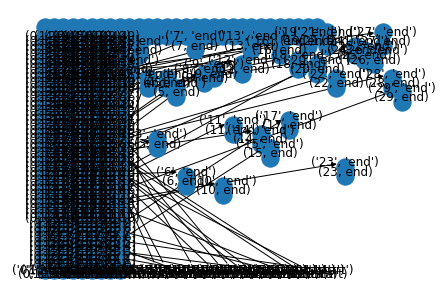

In [1]:
from agv import *

import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()



full_instance_path = 'data_2.json'
model, g_time_expanded, res = solve(full_instance_path)

plot_graph(G=res, plot_weights=False, pos_given=True)


Let's plot your time expanded graph - set the first flag to true if you added weights to your arcs and the second flag to true if you added positions to your nodes (recommended!). For example, you may use the time steps as y coordinates and the location IDs as x coordinates.

**NOTE:** This is just an example for your convenience, you do not need to add positions to your nodes or plot your graph for your submission.